## Sistema inteligente con Red neuronal artificial MLP que clasifica si en una imagen hay un gato

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

Vinculo con github para acceso a comun




In [ ]:
! git clone https://github.com/FNLucero/CatsRecognizer

### Setup inicial

In [2]:
# Se importan las librerias necesarias para el manejo de imágenes y de las RNA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [3]:
# Definición del path al dataset y de categorias (etiquetas)
dataset_path = "./datos/"
categories = ["Michis", "No_Michis"]

In [4]:
# Definición de la función para graficar el Error General
def plot_model_loss(trained):
    plt.plot(trained.history['loss'])
    plt.title('Error General')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper right')
    plt.show()

In [5]:
# Definición de la función para graficar la Matriz de Confusión
def plot_confusion_matrix(model, testX, testY):
    pred = model.predict(testX)
    predictions = np.argmax(pred, axis=1) # return to label

    cm = confusion_matrix(testY, predictions)

    fig = plt.figure(figsize=(8, 6), dpi=90)
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Matriz de Confusión')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + categories)
    ax.set_yticklabels([''] + categories)

    for i in range(2):
        for j in range(2):
            ax.text(i, j, cm[j, i], va='center', ha='center')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    accuracy = accuracy_score(testY, predictions)
    print("Accuracy : %.2f%%" % (accuracy*100.0))

### Carga de datos para el Modelo 1

In [6]:
data = []
labels = []
imagePaths = []
HEIGHT = 120
WIDTH = 120
N_CHANNELS = 3

# Carga de imagenes
for k, category in enumerate(categories):
    for f in os.listdir(dataset_path + category):
        imagePaths.append([dataset_path + category + '/' + f, k])

# Se redimencionan las imagenes y se cargan la data y labels
for imagePath in imagePaths:
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))
    data.append(image)
    
    label = imagePath[1]
    labels.append(label)

print('Tamaño dataset: ' + str(len(data)))

Tamaño dataset: 260


In [7]:
# Se transforman data y labels a un array homogeneo
data = np.array(data)
labels = np.array(labels)

### Definición del Modelo 1: Secuencial de 3 capas

In [8]:
model1 = Sequential([                   
    Flatten(input_shape=(HEIGHT, WIDTH, N_CHANNELS)),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model1.save_weights('model.3l')

### Datos para Entrenamiento 1: 25% del total set de datos

In [9]:
# Se obtiene una porcion del set de datos
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=39) # random_state nos permite "mezclar" basado en un seed
#trainY = np_utils.to_categorical(trainY, len(categories))

Cantidad de epochs para Entrenamiento 1: 35

In [10]:
trained = model1.fit(trainX, trainY, epochs=35)

Epoch 1/35
7/7 [==============================] - 1s 50ms/step - loss: 5685.0293 - accuracy: 0.4769
Epoch 2/35
7/7 [==============================] - 0s 59ms/step - loss: 659.3965 - accuracy: 0.6205
Epoch 3/35
7/7 [==============================] - 0s 55ms/step - loss: 584.1608 - accuracy: 0.6359
Epoch 4/35
7/7 [==============================] - 0s 46ms/step - loss: 317.3798 - accuracy: 0.7179
Epoch 5/35
7/7 [==============================] - 0s 47ms/step - loss: 630.4250 - accuracy: 0.6513
Epoch 6/35
7/7 [==============================] - 0s 49ms/step - loss: 271.5833 - accuracy: 0.7179
Epoch 7/35
7/7 [==============================] - 0s 45ms/step - loss: 227.7735 - accuracy: 0.7641
Epoch 8/35
7/7 [==============================] - 0s 48ms/step - loss: 266.3777 - accuracy: 0.7385
Epoch 9/35
7/7 [==============================] - 0s 53ms/step - loss: 204.1475 - accuracy: 0.7744
Epoch 10/35
7/7 [==============================] - 0s 45ms/step - loss: 113.7471 - accuracy: 0.8205
Epoch 11

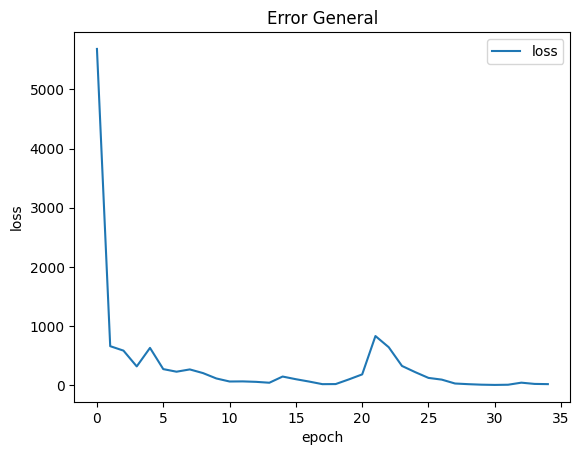

In [11]:
# Graficamos el Error General
plot_model_loss(trained)

3/3 [==============================] - 0s 10ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


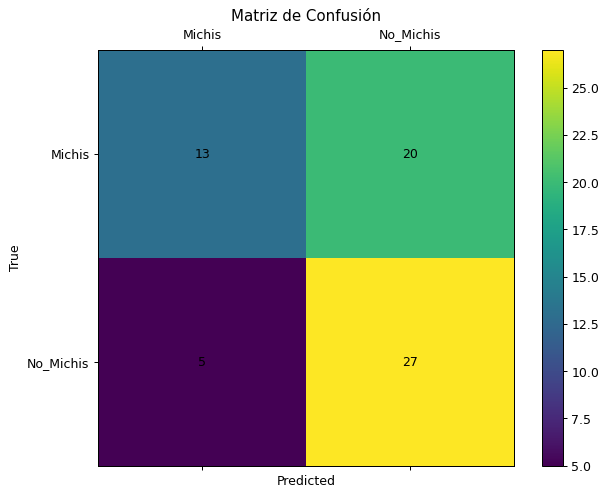

Accuracy : 61.54%


In [12]:
# Graficamos la Matriz de Confusión
plot_confusion_matrix(model1, testX, testY)

In [13]:
# Resetiamos el modelo
model1.load_weights('model.3l')

### Datos para Entrenamiento 2: 80% del total set de datos

In [14]:
# Se obtiene una porcion del set de datos
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.8, random_state=7) # random_state nos permite "mezclar" basado en un seed
#trainY = np_utils.to_categorical(trainY, len(categories))

Cantidad de epochs para Entrenamiento 2: 60

In [15]:
trained = model1.fit(trainX, trainY, epochs=60)

Epoch 1/60
2/2 [==============================] - 0s 37ms/step - loss: 1883.6072 - accuracy: 0.4038
Epoch 2/60
2/2 [==============================] - 0s 41ms/step - loss: 1021.7022 - accuracy: 0.4038
Epoch 3/60
2/2 [==============================] - 0s 46ms/step - loss: 370.2782 - accuracy: 0.5962
Epoch 4/60
2/2 [==============================] - 0s 59ms/step - loss: 595.0109 - accuracy: 0.6346
Epoch 5/60
2/2 [==============================] - 0s 48ms/step - loss: 404.8333 - accuracy: 0.4808
Epoch 6/60
2/2 [==============================] - 0s 45ms/step - loss: 149.4677 - accuracy: 0.5962
Epoch 7/60
2/2 [==============================] - 0s 40ms/step - loss: 65.3108 - accuracy: 0.7500
Epoch 8/60
2/2 [==============================] - 0s 48ms/step - loss: 88.6423 - accuracy: 0.6923
Epoch 9/60
2/2 [==============================] - 0s 60ms/step - loss: 69.3862 - accuracy: 0.6923
Epoch 10/60
2/2 [==============================] - 0s 66ms/step - loss: 40.6701 - accuracy: 0.7115
Epoch 11/60

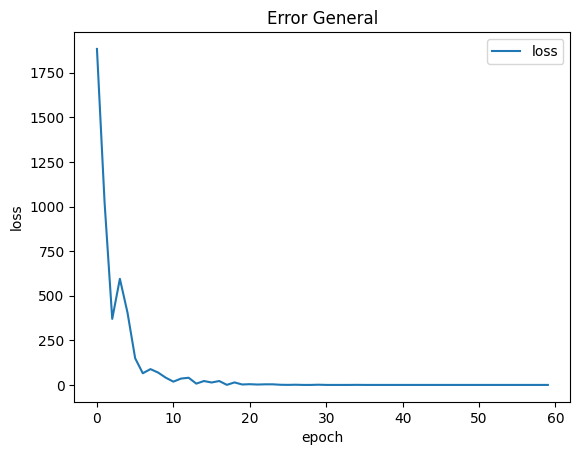

In [16]:
# Graficamos el Error General
plot_model_loss(trained)

7/7 [==============================] - 0s 11ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


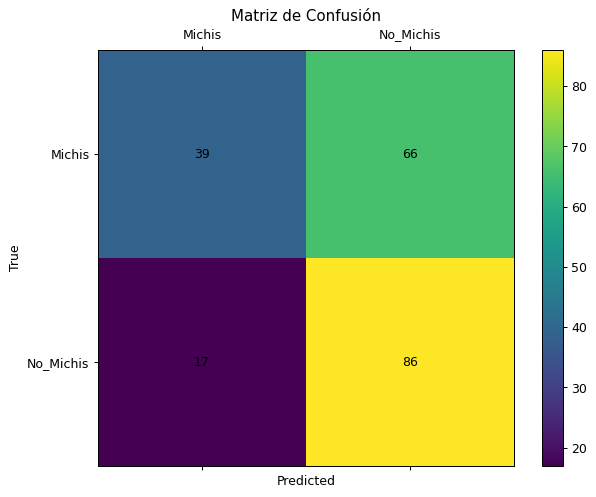

Accuracy : 60.10%


In [17]:
# Graficamos la Matriz de Confusión
plot_confusion_matrix(model1, testX, testY)

### Definición del Modelo 2: Secuencial de 8 capas

In [18]:
model2 = Sequential([
    Convolution2D(32, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(32, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])


### Datos para Entrenamiento 3: 50% del total set de datos

In [19]:
# Se obtiene una porcion del set de datos
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.5, random_state=204) # random_state nos permite "mezclar" basado en un seed
trainY = np_utils.to_categorical(trainY, len(categories))

Cantidad de epochs para Entrenamiento 3: 25

In [20]:
trained = model2.fit(trainX, trainY, epochs=25)

Epoch 1/25
5/5 [==============================] - 2s 187ms/step - loss: 261.1792 - accuracy: 0.4846
Epoch 2/25
5/5 [==============================] - 1s 186ms/step - loss: 139.0484 - accuracy: 0.4769
Epoch 3/25
5/5 [==============================] - 1s 193ms/step - loss: 47.2782 - accuracy: 0.6077
Epoch 4/25
5/5 [==============================] - 1s 210ms/step - loss: 12.6309 - accuracy: 0.6769
Epoch 5/25
5/5 [==============================] - 1s 220ms/step - loss: 4.3278 - accuracy: 0.7615
Epoch 6/25
5/5 [==============================] - 1s 187ms/step - loss: 1.1923 - accuracy: 0.8231
Epoch 7/25
5/5 [==============================] - 1s 188ms/step - loss: 0.6114 - accuracy: 0.8462
Epoch 8/25
5/5 [==============================] - 1s 186ms/step - loss: 1.2614 - accuracy: 0.9000
Epoch 9/25
5/5 [==============================] - 1s 197ms/step - loss: 0.1514 - accuracy: 0.9231
Epoch 10/25
5/5 [==============================] - 1s 186ms/step - loss: 0.1314 - accuracy: 0.9385
Epoch 11/25
5

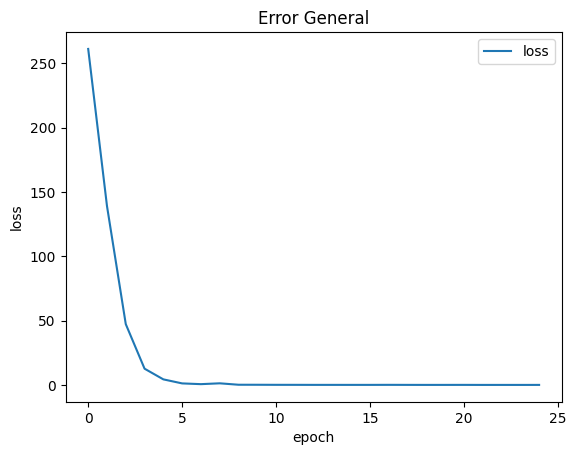

In [21]:
# Graficamos el Error General
plot_model_loss(trained)

5/5 [==============================] - 0s 47ms/step


C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\HD279CW\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


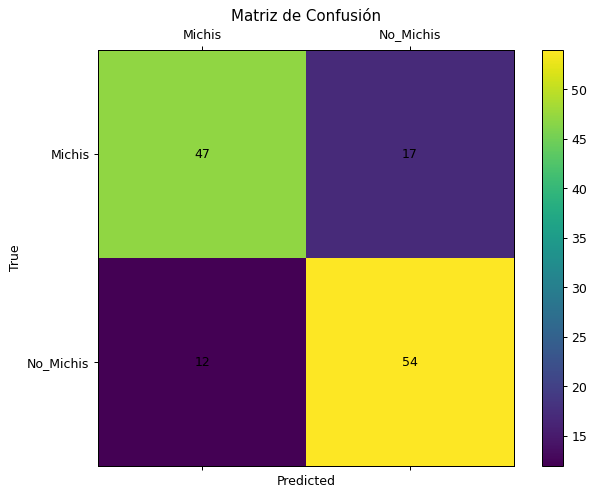

Accuracy : 77.69%


In [22]:
# Graficamos la Matriz de Confusión
plot_confusion_matrix(model2, testX, testY)

### Predicciones

Pruebas manuales para corroborar el funcionamiento de los modelos de Red Neuronal Artificial creados

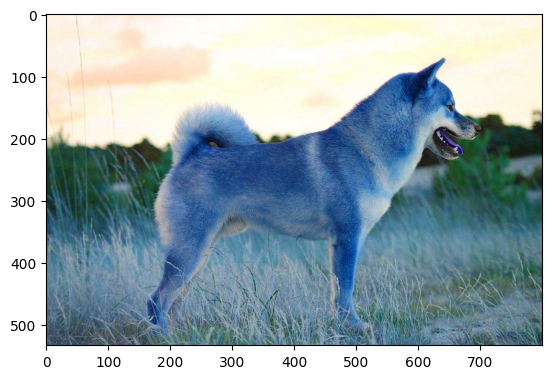

1/1 [==============================] - 0s 46ms/step
> Etiqueta:  No_Michis


In [23]:
img_a_predecir = cv2.imread('./datos/pruebas/shiba.jpg')

plt.imshow(img_a_predecir)
plt.show()

img_a_predecir = cv2.resize(img_a_predecir, (WIDTH, HEIGHT))
img_a_predecir = np.expand_dims(img_a_predecir, 0)

predictions_single = model2.predict(img_a_predecir)
print("> Etiqueta: ", categories[np.argmax(predictions_single)])